# Rede neural para classificar se uma pessoa possui doença cardíaca 
Foi utilizado este dataset https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import keras
from keras.metrics import *
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Reading data from csv
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Dividindo os dados entre treino e teste
80% parq treino e 20% para teste

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:13], data.iloc[:,13], test_size = 0.2, shuffle = True, stratify = data['target'])

In [4]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2


In [5]:
y_train

2      1
270    0
297    0
176    0
125    1
      ..
287    0
69     1
11     1
120    1
182    0
Name: target, Length: 242, dtype: int64

In [6]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2


In [7]:
y_test

216    0
293    0
210    0
276    0
192    0
      ..
144    1
123    1
60     1
43     1
93     1
Name: target, Length: 61, dtype: int64

## Preparando os dados para serem usados
Normalização das colunas

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
train = x_train.iloc[:,:].values.astype(float)

In [11]:
test = x_test.iloc[:,:].values.astype(float)

In [12]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [13]:
x_train_normalized = pd.DataFrame(train_scaled,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
x_test_normalized = pd.DataFrame(test_scaled,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [14]:
x_train_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.250000,0.0,0.333333,0.339623,0.168591,0.0,0.0,0.736842,0.0,0.225806,1.0,0.00,0.666667
1,0.354167,1.0,0.000000,0.245283,0.272517,0.0,0.0,0.491228,0.0,0.129032,1.0,0.00,1.000000
2,0.625000,1.0,0.000000,0.660377,0.103926,1.0,0.0,0.017544,0.0,0.161290,0.5,0.50,0.333333
3,0.645833,1.0,0.000000,0.216981,0.228637,1.0,0.5,0.631579,1.0,0.225806,1.0,0.50,1.000000
4,0.104167,0.0,0.333333,0.226415,0.182448,0.0,0.5,0.912281,0.0,0.112903,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.583333,1.0,0.333333,0.566038,0.233256,0.0,0.0,0.666667,0.0,0.000000,1.0,0.25,0.666667
238,0.687500,0.0,0.000000,0.283019,0.180139,0.0,0.5,0.657895,0.0,0.000000,1.0,0.00,0.666667
239,0.395833,0.0,0.666667,0.339623,0.332564,0.0,0.5,0.447368,0.0,0.032258,1.0,0.00,0.666667
240,0.729167,0.0,0.000000,0.339623,0.397229,0.0,0.5,0.298246,0.0,0.322581,0.5,0.50,0.666667


In [15]:
x_test_normalized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.658537,0.0,0.666667,0.375,0.702564,0.0,0.5,0.228070,0.0,0.214286,0.5,0.25,1.000000
1,0.780488,1.0,0.666667,0.650,0.441026,0.0,0.0,0.692982,0.0,0.142857,0.5,0.00,1.000000
2,0.536585,1.0,0.666667,0.350,0.528205,0.0,0.0,0.692982,0.0,0.071429,0.5,0.25,1.000000
3,0.560976,1.0,0.000000,0.575,0.471795,0.0,0.5,0.298246,0.0,0.357143,0.5,0.25,1.000000
4,0.463415,1.0,0.000000,0.250,0.317949,0.0,0.5,0.368421,0.0,0.250000,0.5,0.25,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.000000,0.0,0.666667,0.500,0.364103,0.0,1.0,0.394737,0.0,0.196429,0.5,0.00,0.666667
57,0.463415,0.0,0.666667,0.100,0.723077,0.0,0.0,0.842105,0.0,0.000000,1.0,0.00,0.666667
58,0.878049,0.0,0.666667,0.125,0.712821,1.0,0.0,0.517544,0.0,0.000000,1.0,0.25,0.666667
59,0.439024,0.0,0.000000,0.375,0.707692,0.0,0.0,0.631579,0.0,0.071429,0.5,0.00,0.666667


## Criando o modelo

In [111]:
model1 = Sequential()

In [112]:
model1.add(Dense(1000, activation='relu', input_shape=(13,)))
model1.add(Dropout(0.90))
model1.add(Dense(1, activation='sigmoid'))

In [113]:
model1.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate = 0.01),
               metrics=['accuracy'])

## Treinando o modelo
Usou-se batch gradient descent junto com early stopping

In [114]:
batch_size = 242
epochs = 100
history = model1.fit(
    x_train_normalized, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(x_test_normalized, y_test),
    shuffle = True,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=50,min_delta=0.01)])

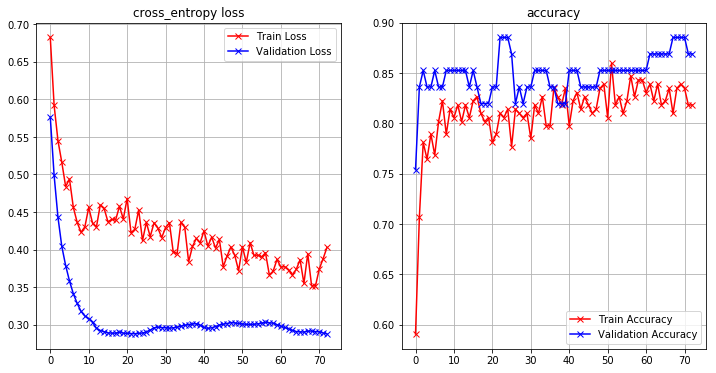

In [115]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

## Avaliando o classificador

In [116]:
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

predictions = []

for index, row in x_test_normalized.iterrows():
    real = (y_test.iloc[index])
    predicted = int(np.around(model1.predict(np.array(row.values).reshape(1,13)))[0][0])
    predictions.append(predicted)
    
    # true positives
    if real==1 and predicted==1:
        true_positives += 1
    
    # false positives
    if real==0 and predicted==1:
        false_positives += 1
    
    # true negatives
    if real==0 and predicted==0:
        true_negatives += 1
        
    # false negatives
    if real==1 and predicted==0:
        false_negatives += 1
        
total = true_positives + true_negatives + false_positives + false_negatives
acertos = true_negatives + true_positives
predictions = np.array(predictions)

### Acurácia e taxa de erro
Total de 61 casos de teste

In [117]:
print('Total de testes:',total)
print('Acurácia:',acertos/total)
print('Taxa de erro:',(total-acertos)/total)

Total de testes: 61
Acurácia: 0.8688524590163934
Taxa de erro: 0.13114754098360656


In [118]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

### Matriz de confusão

In [119]:
confusion_matrix(y_test,predictions)

array([[23,  5],
       [ 3, 30]])

### Precision e Recall

In [120]:
print('Precision:',precision_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))

Precision: 0.8571428571428571
Recall: 0.9090909090909091


### AUC-ROC

In [121]:
roc_auc_score(y_test,predictions)

0.8652597402597402

### Curva ROC

In [122]:
fpr, tpr, _ = roc_curve(y_test,predictions)

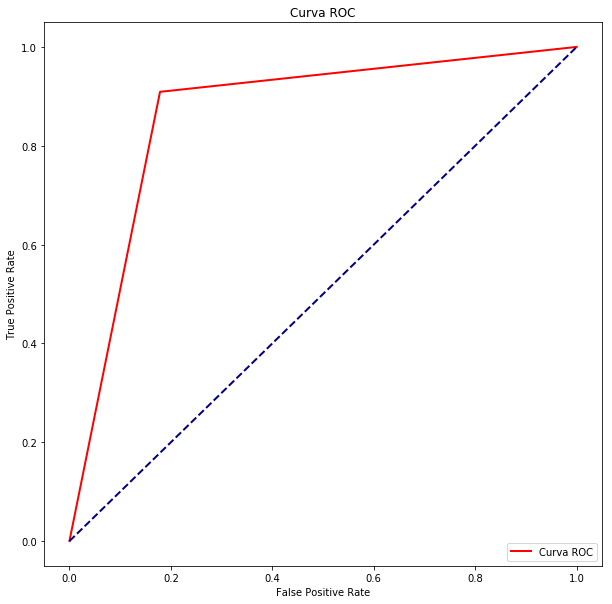

In [123]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, color='red', label='Curva ROC',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")